In [1]:
from ipywidgets import interact, fixed, interactive, widgets, interact_manual
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import effPlotwidget as effplt
reload(effplt)
effplt.defaultWidgets()

import plotting as plotting

import util as ut

Welcome to ROOTaaS 6.06/08


In [2]:
genb = None 


genb = ["genPt","genRapidity",
                             "genJet2p5Pt0","genJet2p5Rapidity0",
                             "genJet2p5Pt1","genJet2p5Rapidity1",
                             "genJet2p5Pt2","genJet2p5Rapidity2",
                             "genJet2p5Pt3","genJet2p5Rapidity3",
                             "genJet2p5Pt4","genJet2p5Rapidity4",
                             "weight",
                             "genNjets2p5",
                             'genLeadGenIso', 'genSubleadGenIso',
                             #'genLeadEta', 'genSubleadEta'
              ]

w = interactive(effplt.GetDictionary,inputDir=effplt.widgetparams['w_inputDir'])
display(w)
#extract the dictionary with the classifier names found in the
#given directory plus the directory name
class_dict = w.result[0]
inDir = w.result[1]

fitterObject = interactive(effplt.GetFitter,
                           inputName=class_dict,
                            dataDir =effplt.widgetparams['w_dataDir'],
                            inputDir=fixed(inDir),
                            load = effplt.widgetparams['w_Load'],
                            genBranch_params = fixed(genb)
                          )

display(fitterObject)

entered config files named my_train_config
hi
None
Load object with the name 3clfs_GenIsoAdded_4JetAbsNjetsAdded and the following paramters 
loading
3clfs_GenIsoAdded_4JetAbsNjetsAdded
./classifiers
./classifiers
./classifiers/3clfs_GenIsoAdded_4JetAbsNjetsAdded.pkl.gz
loading pickle ./classifiers/3clfs_GenIsoAdded_4JetAbsNjetsAdded.pkl.gz
loading data ./classifiers/3clfs_GenIsoAdded_4JetAbsNjetsAdded.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4',
       u'genJet2p5Rapidity0', u'genJet2p5Rapidity1', u'genJet2p5Rapidity2',
       u'genJet2p5Rapidity3', u'genJet2p5Rapidity4', u'genLeadGenIso',
       u'genNjets2p5', u'genPt', u'genRapidity', u'genSubleadGenIso',
       u'recoNjets2p5', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity', u'absGenJet2p5Rapidity0', u'absGenJet2p5Rapidity1',
       u'absGenJet2p5Rapidity2', u'absGenJet2p5Rapidity3', u'class_prob_0',
       u'class_prob_1',

In [8]:
df = fitterObject.result.df

first_train_evt = int(round(df.index.size*(1.-fitterObject.result.split_frac)))
#take the test sample 
df_test = df[:first_train_evt]

In [13]:
def GetProdProcName (n) :
    if (n==0) :
        return 'ggF'
    if (n==1) :
        return 'ttH'
    if (n==2) :
        return 'VBF'
    if (n==3) :
        return 'VH'
    

In [14]:
class_list = ['class','recoPt','recoNjets2p5']

#class_list = ['recoPt']

In [15]:
save_directory = './plots/totEffperCat/'+ut.params['inputName']
print(save_directory)

./plots/totEffperCat/3clfs_GenIsoAdded_4JetAbsNjetsAdded


In [ ]:
reload(plotting)
for cl in class_list :
    for prod_mech in xrange(1) :
           
        plotting.draw_data_mc(df=df_test[df_test['proc']==prod_mech],
                               column = cl, 
                              logy=False, 
                              ratio=False,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(prod_mech),
                              absolute=False
                             )
        

There are 4 features of type class


plotting.py:490: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


('sqrt error for poissonian', array([ 139.08989899,  155.19020588,  202.        ]))


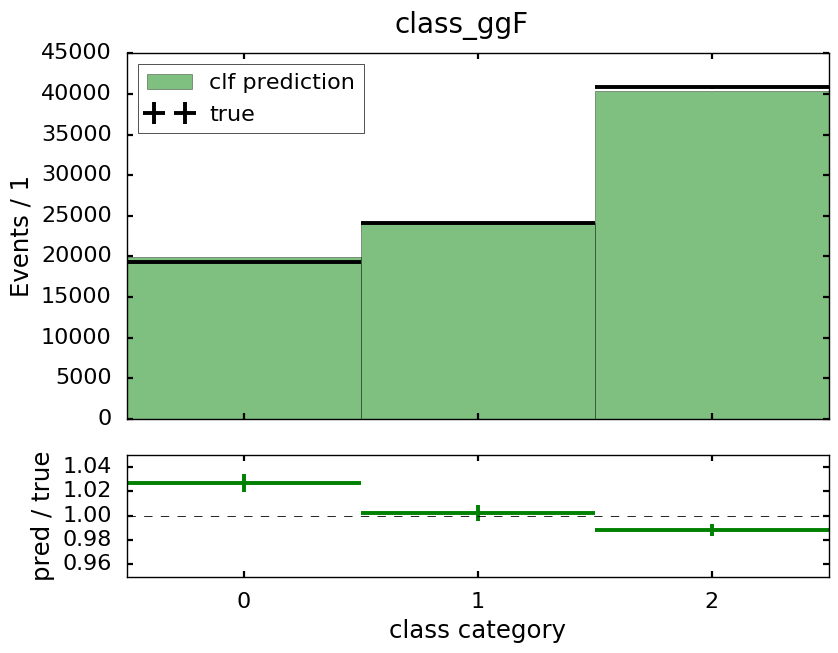

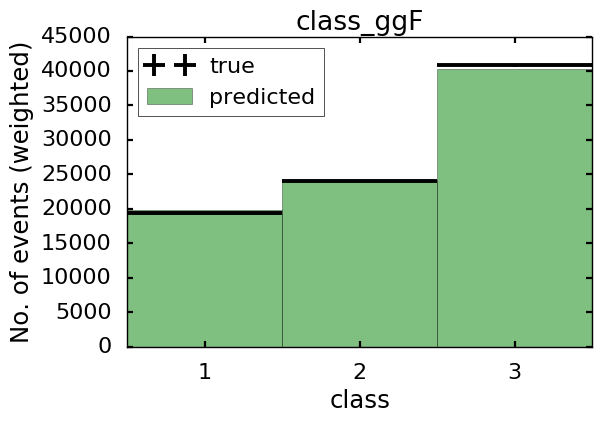

There are 4 features of type class
('sqrt error for poissonian', array([ 91.53687781,  91.126286  ,  98.60020284]))


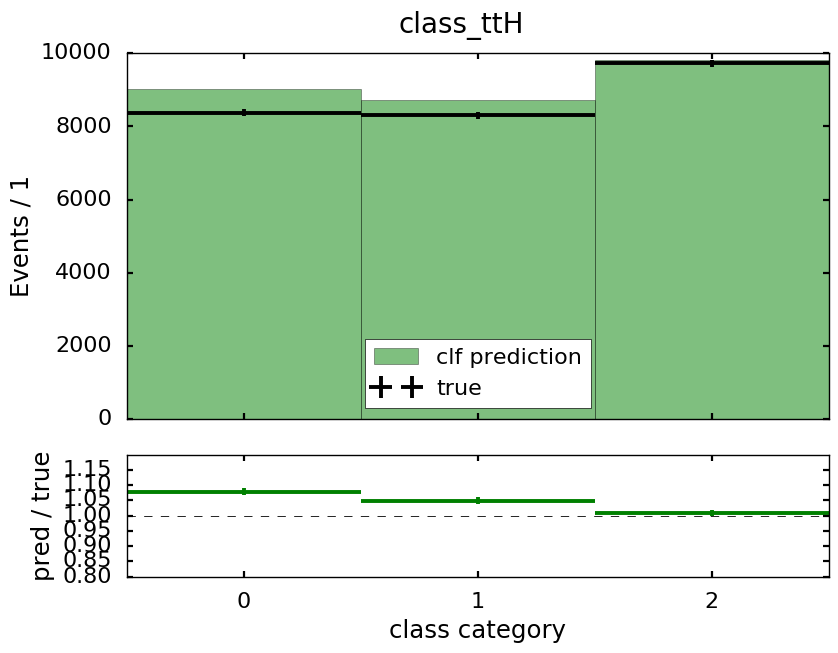

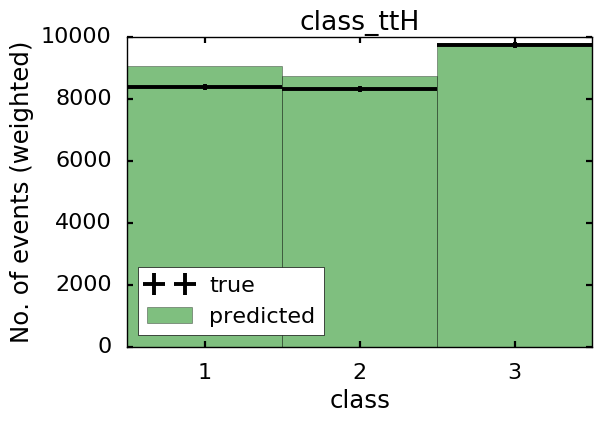

There are 4 features of type class
('sqrt error for poissonian', array([ 161.81779877,  173.95976546,  218.5520533 ]))


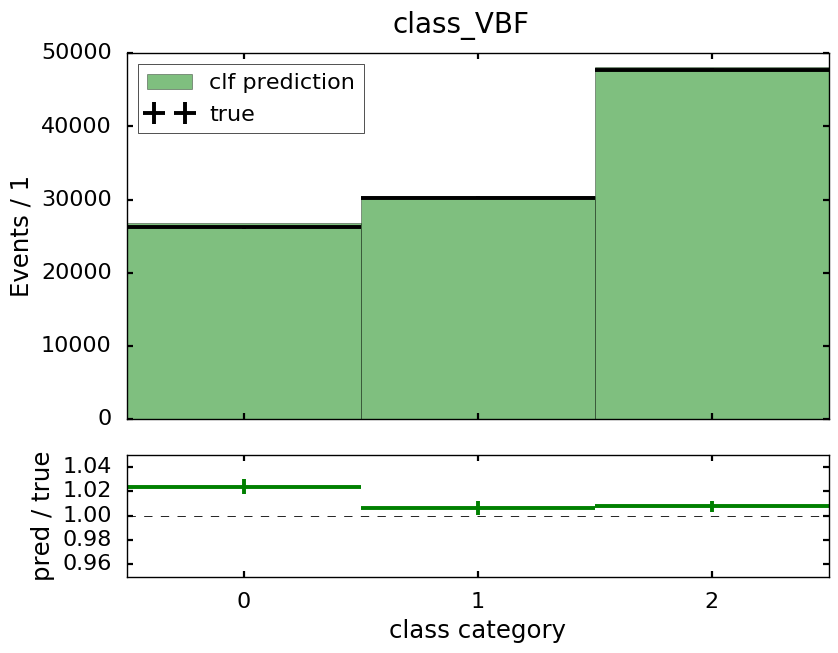

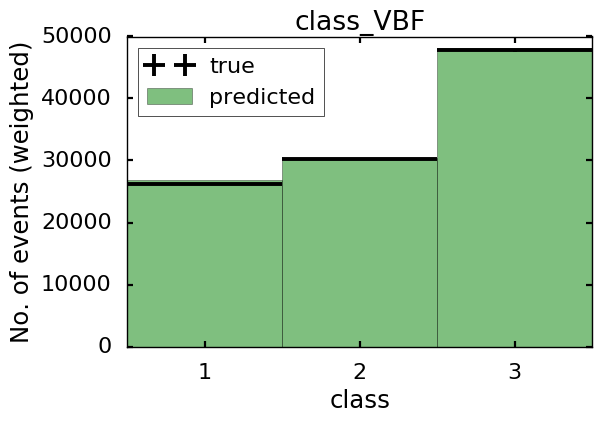

There are 4 features of type class
('sqrt error for poissonian', array([ 65.93936609,  73.15736463,  98.94948206]))


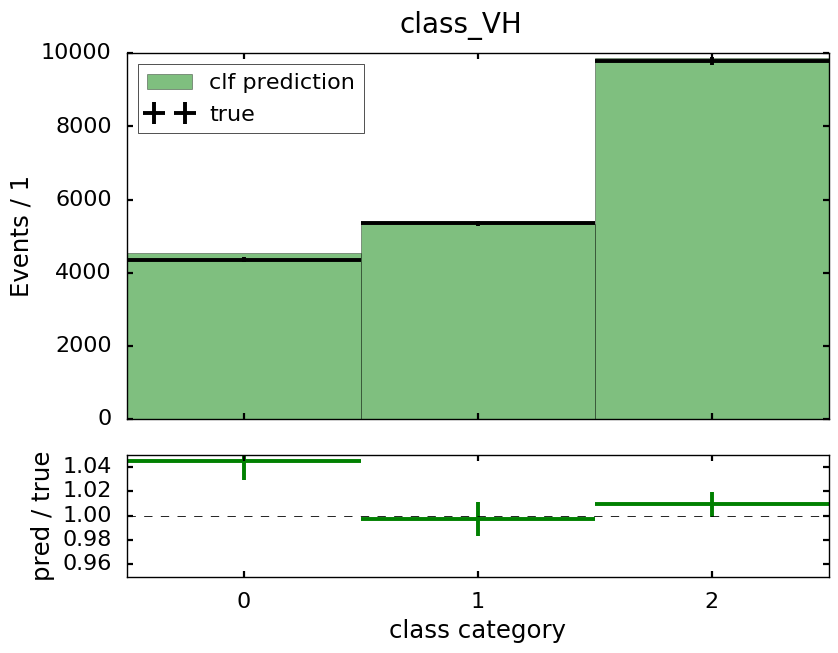

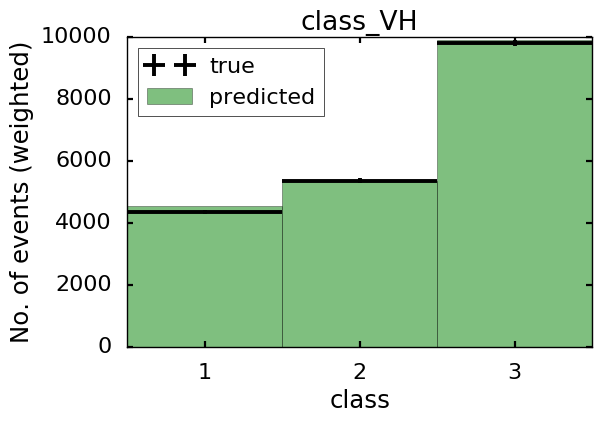

There are 25 features of type recoPtCat
('sqrt error for poissonian', array([  52.81098371,   59.82474404,   82.19489035,   60.38211656,
         71.66589147,   95.29952781,   56.78027827,   65.53624951,
         86.30758947,   68.38859554,   76.54410493,  100.55844072,
         42.97673789,   48.17675788,   60.95079983,   40.39801975,
         41.50903516,   50.29910536,   33.88214869,   30.4466747 ,
         31.40063694,   19.57038579,   15.62049935,   13.19090596]))


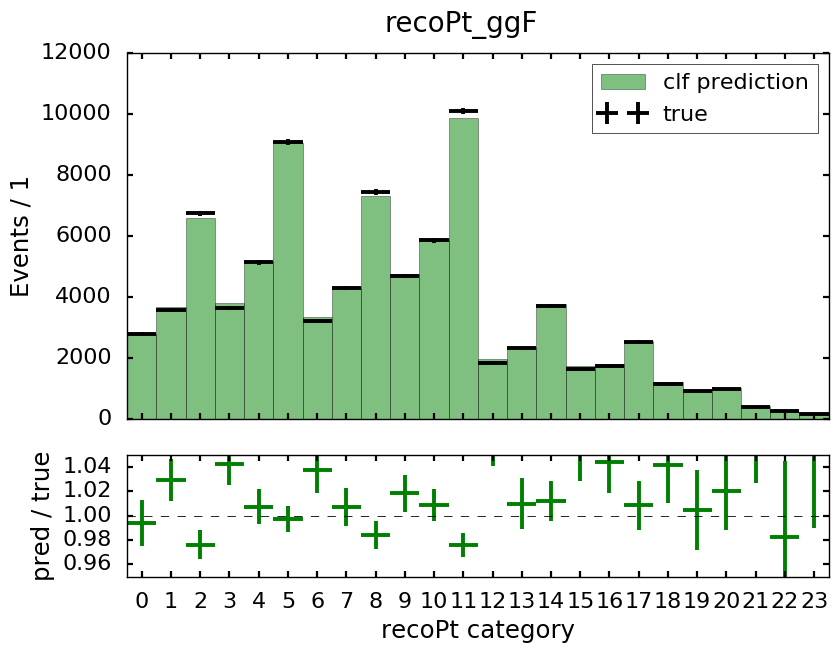

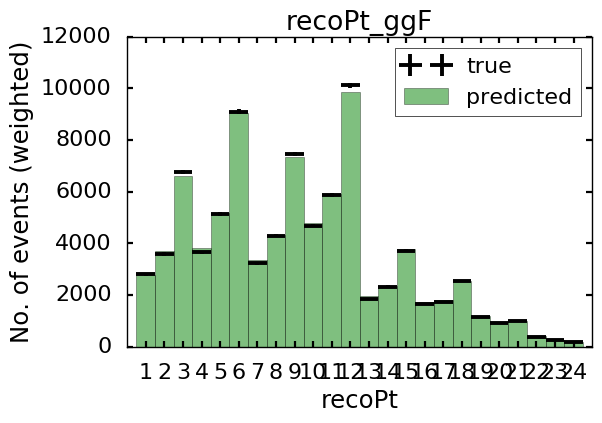

There are 25 features of type recoPtCat
('sqrt error for poissonian', array([  9.38083152,  11.3137085 ,  14.03566885,  17.74823935,
        19.10497317,  22.95648057,  20.63976744,  23.89560629,
        28.23118843,  38.4317577 ,  41.78516483,  48.64154603,
        36.16628264,  40.91454509,  46.19523785,  45.254834  ,
        45.26588119,  47.81213235,  44.05678154,  37.14835124,
        34.21987726,  27.85677655,  19.77371993,  15.62049935]))


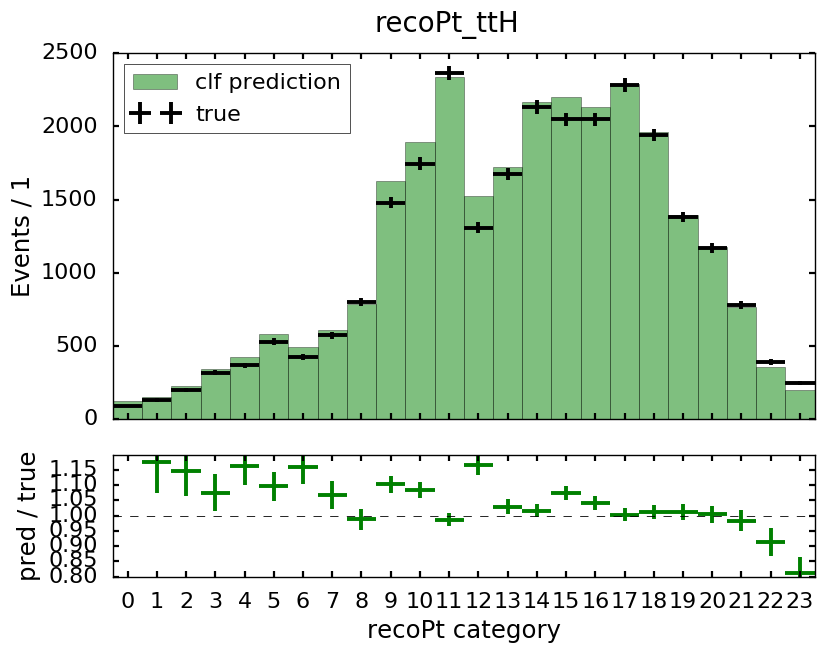

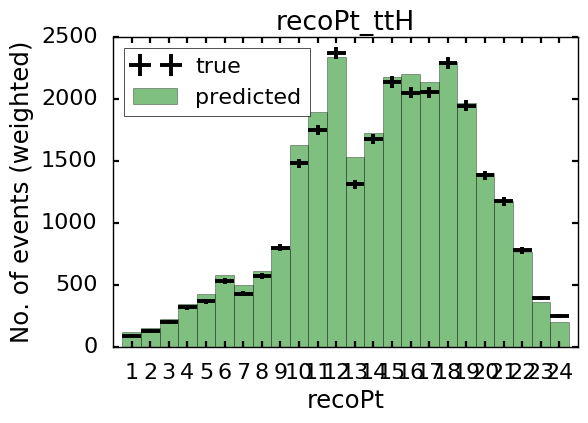

There are 25 features of type recoPtCat
('sqrt error for poissonian', array([  26.85144316,   30.69201851,   40.79215611,   43.72642222,
         49.689033  ,   67.00746227,   51.73973328,   57.84461946,
         77.97435476,   87.10338685,   96.91233152,  125.35948309,
         71.21095421,   78.5684415 ,  100.60815076,   71.42128534,
         74.10128204,   85.12343978,   51.33225107,   46.5295605 ,
         47.16990566,   21.9317122 ,   16.85229955,   14.93318452]))


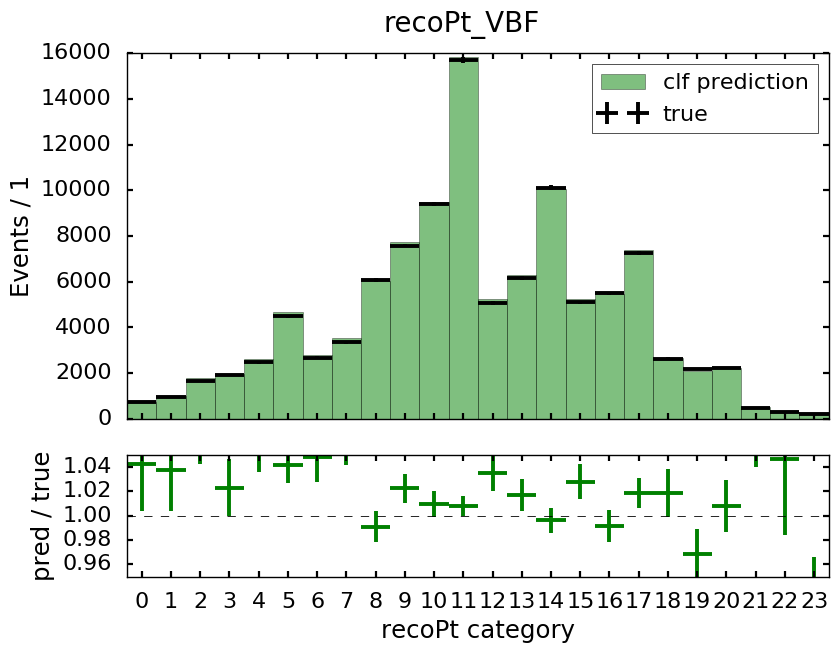

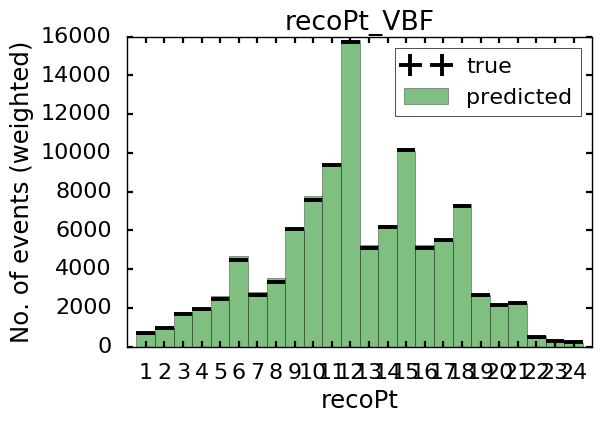

There are 25 features of type recoPtCat
('sqrt error for poissonian', array([ 11.18033989,  12.20655562,  18.46618531,  17.91647287,
        20.92844954,  30.62678566,  20.63976744,  23.70653918,
        34.16138171,  33.83784863,  40.21193853,  55.52476925,
        28.54820485,  32.34192326,  44.19275959,  28.60069929,
        31.09662361,  39.14077158,  23.        ,  21.21320344,
        26.28687886,  13.        ,  11.09053651,   9.2736185 ]))


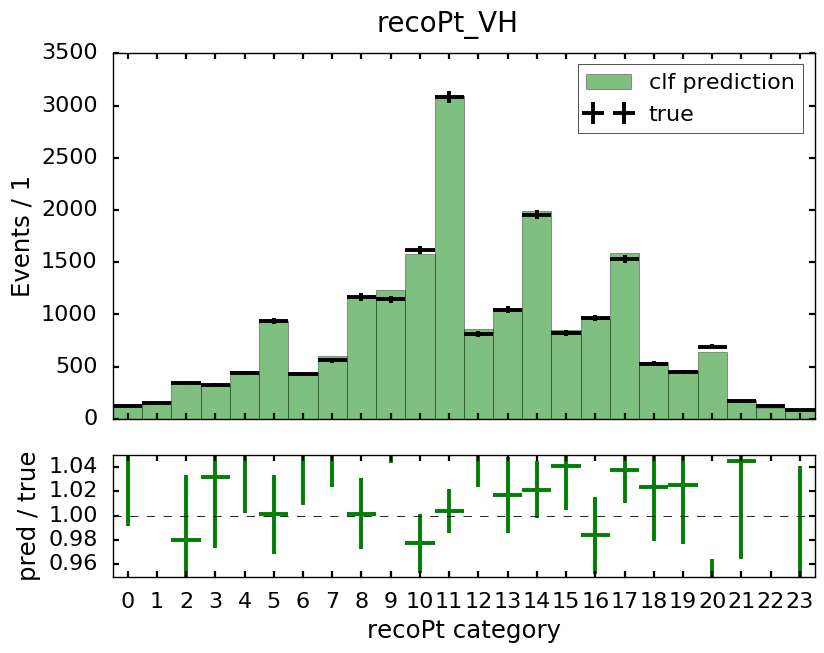

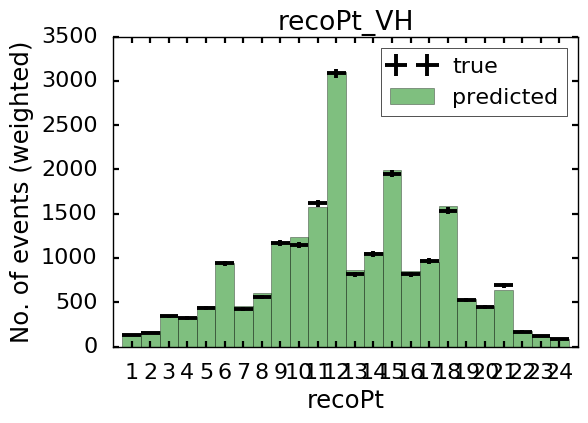

There are 16 features of type recoNjets2p5Cat
('sqrt error for poissonian', array([  97.65244493,  112.37882363,  150.22649567,   78.65748534,
         87.07468059,  112.01339206,   50.84289528,   53.50700889,
         64.89992296,   27.69476485,   27.69476485,   33.85262176,
         16.46207763,   15.58845727,   18.1934054 ]))


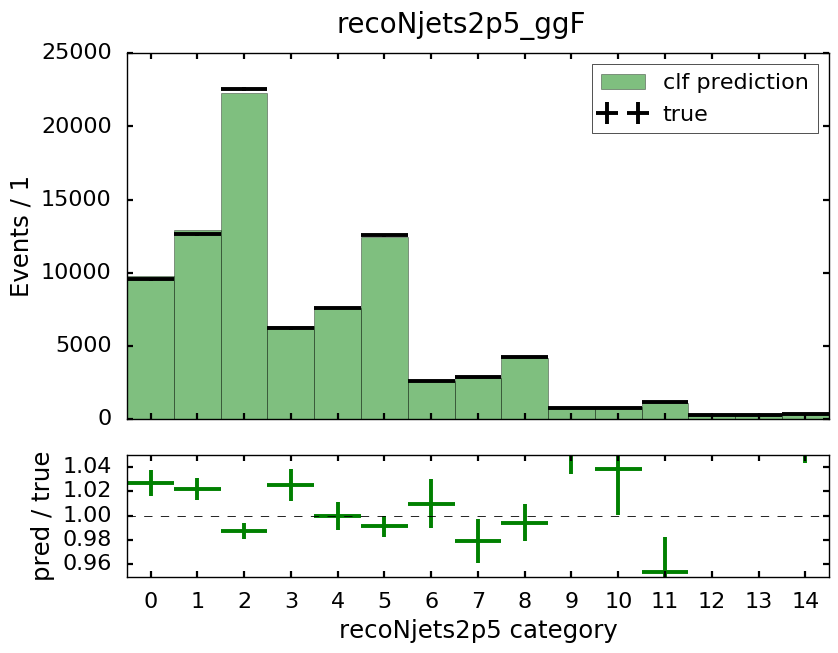

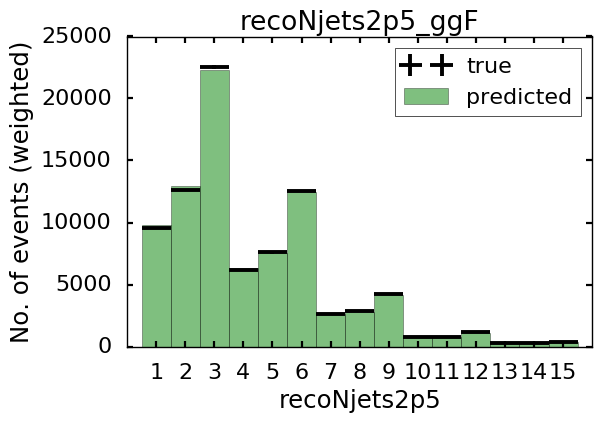

There are 16 features of type recoNjets2p5Cat
('sqrt error for poissonian', array([  4.69041576,   5.29150262,   7.93725393,   7.28010989,
         7.74596669,  10.72380529,  19.07878403,  18.27566688,
        23.36664289,  33.45145737,  33.61547263,  38.09199391,
        82.58934556,  82.17055434,  86.87347121]))


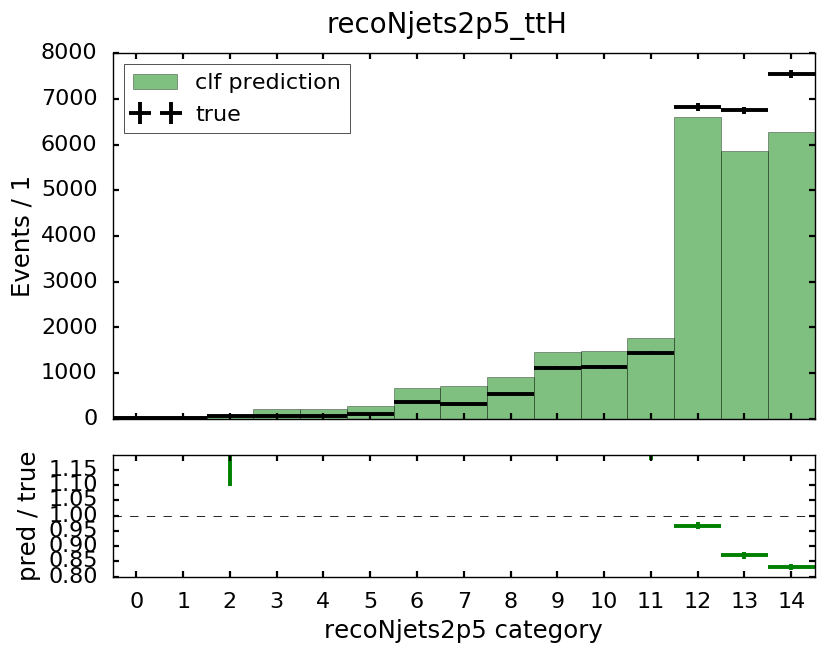

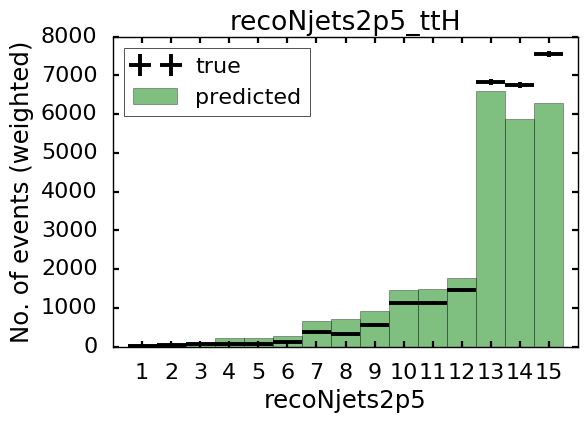

There are 16 features of type recoNjets2p5Cat
('sqrt error for poissonian', array([  84.95292814,   93.82963285,  122.96747537,  108.94035065,
        117.47340124,  150.76803375,   73.83088785,   77.29165544,
         89.14594775,   36.61966685,   37.61648575,   40.49691346,
         17.54992877,   16.40121947,   18.05547009]))


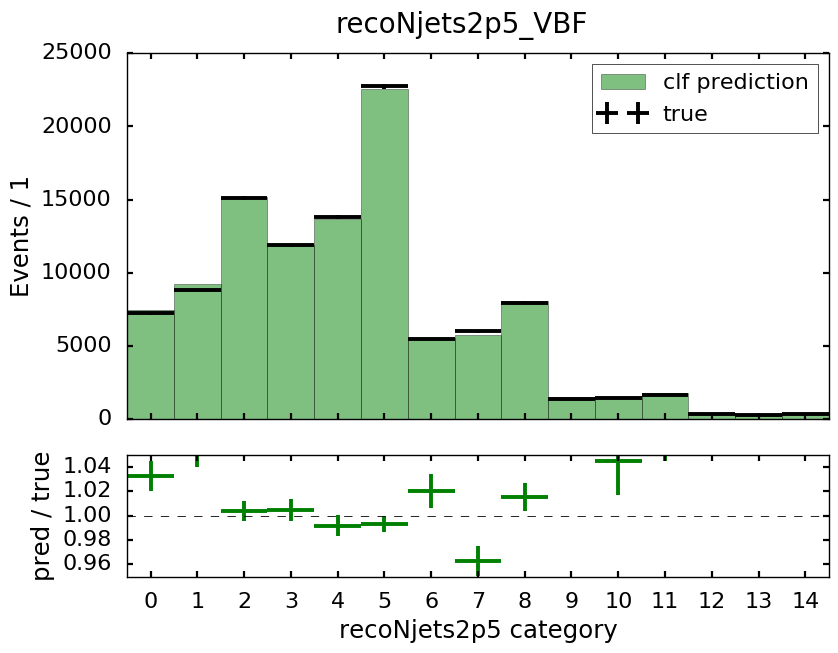

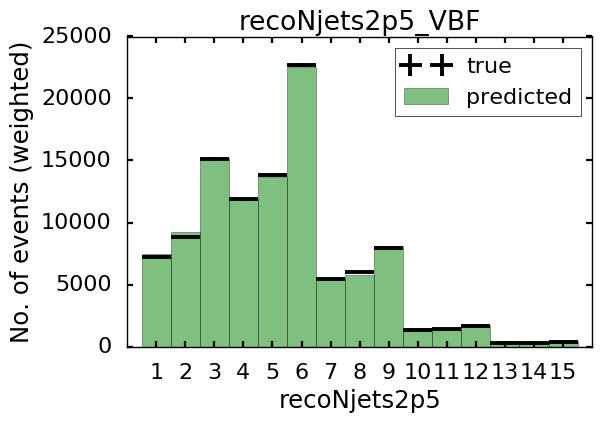

There are 16 features of type recoNjets2p5Cat
('sqrt error for poissonian', array([ 22.44994432,  25.92296279,  40.39801975,  36.48287269,
        41.20679556,  57.03507693,  37.48332963,  42.01190308,
        54.79963504,  27.40437921,  28.8444102 ,  36.        ,
        18.89444363,  19.62141687,  24.63736999]))


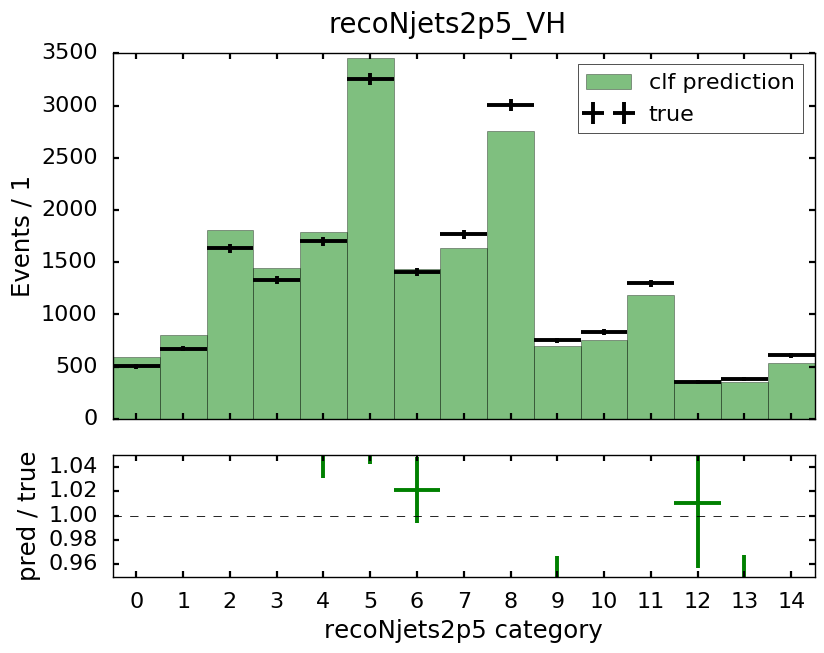

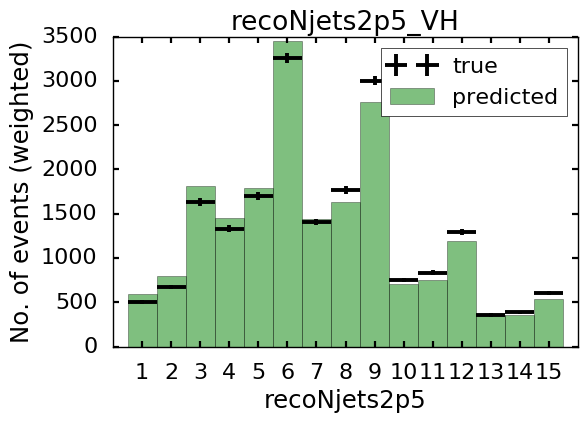

In [7]:
plotflag = False
reload(plotting)
for cl in class_list :
    for prod_mech in xrange(4) :
           
        if plotflag :
            plotting.naive_closure(df_test[df_test['proc']==prod_mech],
                               column = cl, logy=False, absolute=True,first=1,
                       savepath=save_directory,title=cl+'_'+GetProdProcName(prod_mech))
        else :
            plotting.naive_closure(df_test[df_test['proc']==prod_mech],
                               column = cl, logy=False, absolute=True,first=1,
                    title=cl+'_'+GetProdProcName(prod_mech),
                                   savepath=save_directory
                                  )

In [ ]:
reload(plotting)

In [ ]:
plotting.naive_closure(df_test,'recoNjets2p5',logy=False,absolute=False,first=1,
                       title='recoNjets2p5')

In [ ]:
import numpy as np

In [ ]:
colors = ['green','red','cyan']
for prodmech in np.arange(1,4,1) :
    print('number of weights in the process '+ GetProdProcName(prodmech) + ': ' +
          str(len(df_test[df_test['proc']==prodmech]['weight'])))
    print ('minumum is: ' + str(df_test[df_test['proc']==prodmech]['weight'].min()))
    print ('maximum is: ' + str(df_test[df_test['proc']==prodmech]['weight'].max()))
    print ('-------------------------')
    plt.hist(df_test[df_test['proc']==prodmech]['weight'],bins=100,label=GetProdProcName(prodmech),range=[-4e-5,4e-5]
            ,alpha=.5,color=colors[prodmech-1])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='best')
plt.show()

In [ ]:
for prodmech in xrange(4) :
    print('weights for ' + str(GetProdProcName(prodmech)))
    print(df_test[(df_test['proc']==prodmech) & (df_test['weight']>=0 ) ]['weight'].count())
    print(df_test[(df_test['proc']==prodmech) & (df_test['weight']<0 ) ]['weight'].count())
    plt.hist(df[df['proc']==prodmech]['weight'],bins=100,label=GetProdProcName(prodmech),range=[-4e-4,4e-4]
            ,alpha=.5)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='best')
plt.show()

# Investigating error bars on VBF

In [ ]:
df_VBF = df_test[df_test['proc']==2]
df_ggF = df_test[df_test['proc']==0]

In [ ]:
df_VBF['weight'].count()

In [ ]:
df_ggF['weight'].count()

In [ ]:
reload(plotting)

In [ ]:
plotting.naive_closure(df_VBF,'class',first=0,absolute=False)

In [ ]:
plotting.naive_closure(df_ggF,'class',first=0,absolute=False)

In [ ]:
import numpy as np
np.sqrt(8000)